# 2022 Wellness Tracking

## Objectives 

The objective of this project is to record and analyze the relationships between input variables and target variables throughout the 2022 Midland Rockhound season in the Texas League of AA baseball to create actionable ideas on how to increase performance. This project also strives to incorporate mental variables as well as physical ones, in the hopes of observing the impacts of mental health and training in sport as well as physical.

## Methods 

This project will involve various data cleaning and manipulation methods, which will be more specifically explained upon implementation. However, the focus of this project is on machine learning implementations, and analyzing feature impact on target variables.

## Imports and Data Cleaning 

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [49]:
# Importing CSV data

# filename = 'Data/michael_wellness_data.csv'
filename = 'Data/test.csv'
def read_csv(filename):
    df = pd.read_csv(filename)
    return df

data = read_csv(filename)
column_headers = data.columns

In [50]:
drop_headers = ['Thought of the Day', 'Game Notes']

data = data.drop(drop_headers, axis=1)
data = data.dropna(axis=0, thresh=3)
column_headers = data.columns
num_entries = data.shape[0]
data.iloc[0:10,:]

,Date,Day of Week,Whoop Recovery,HRV,Hours of Sleep,Body Weight,Body Fat %,Body Water %,Hydration Score (urine),Sick Feeling,...,Lift?,Protein Shake?,Fun Rating,Family Love Rating,Tired Rating,Strain,Alcohol (# of Drinks),CBD (mg),Melatonin,Current BA
0,4/14/2022,4,99.0,61.0,8.950,174.5,NaN,NaN,7.0,2.0,...,0.0,0.0,7.0,7.0,5.0,15.7,0.0,0.0,0.0,NaN
1,4/15/2022,5,81.0,51.0,9.050,175.8,NaN,NaN,7.0,1.0,...,1.0,0.0,2.0,6.0,8.0,17.5,0.0,0.0,0.0,NaN
2,4/16/2022,6,82.0,51.0,8.330,177.0,NaN,NaN,5.0,1.0,...,0.0,0.0,4.0,6.0,6.0,13.9,2.0,0.0,0.0,NaN
3,4/17/2022,0,76.0,51.0,7.320,174.8,NaN,NaN,5.0,2.0,...,0.0,0.0,8.0,8.0,3.0,5.5,1.0,0.0,0.0,NaN
4,4/18/2022,1,77.0,51.0,6.920,172.2,NaN,NaN,4.0,1.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4/19/2022,2,NaN,NaN,NaN,173.6,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4/20/2022,3,NaN,NaN,NaN,173.9,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4/21/2022,4,86.0,NaN,7.683,173.9,NaN,NaN,8.0,0.0,...,0.0,2.0,0.0,6.0,3.0,16.0,0.0,0.0,0.0,NaN
8,4/22/2022,5,93.0,NaN,8.367,175.8,21.9,56.3,7.0,0.0,...,0.0,2.0,1.0,7.0,6.0,15.0,0.0,0.0,0.0,NaN
9,4/23/2022,6,88.0,NaN,8.250,177.0,22.2,56.2,7.0,0.0,...,1.0,2.0,1.0,6.0,4.0,16.5,0.0,0.0,0.0,NaN


In [51]:
target_variables = ['Whoop Recovery', 'HRV', 'Body Weight', 'Current BA']

morning_variables = ['Day of Week', 'Whoop Recovery', 'HRV', 'Hours of Sleep',
                     'Body Weight', 'Body Fat %', 'Body Water %', 'Hydration Score (urine)',
                     'Sick Feeling', 'Soreness/Fatigue Score', 'Fitness Rating',
                     'Positivity Score (1-10)', 'Confidence Score', 'Date']
night_variables = ['Caffeine in mg',
                   'Water Before Coffee?', 'Breakfast Before Coffee?',
                   'Devo Quality (1-10)', 'Game?', 'Lift?', 'Protein Shake?', 'Fun Rating',
                   'Family Love Rating', 'Tired Rating', 'Strain', 'Alcohol (# of Drinks)',
                   'CBD (mg)', 'Melatonin', 'Current BA']

In [52]:
def update_df(df, morning, night, target):
    if target in night:
        night.remove(target)
    df['Date'] = pd.to_datetime(df['Date'])
    curr_day = df.drop(night, axis=1)
    prev_day = df.drop(morning, axis=1)
    prev_day = prev_day.shift(periods=1)
    return pd.concat([curr_day, prev_day], axis=1, join='inner')
    
adjusted_df = update_df(data, morning=morning_variables, night=night_variables, target=target_variables[0])

In [53]:
def drop_nans(df, threshold=0.5):
    df_length = df.shape[0]
    df = df.dropna(thresh=threshold * df_length, axis=1).dropna(how='any', axis=0)
    return df
    
adjusted_df = drop_nans(adjusted_df)
X = adjusted_df.drop([target_variables[0], 'Date'], axis=1)
y = adjusted_df[target_variables[0]]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X.iloc[0:10,:]

,Day of Week,Hours of Sleep,Body Weight,Sick Feeling,Alcohol (# of Drinks),CBD (mg)
1,5,9.050,175.8,1.0,0.0,0.0
2,6,8.330,177.0,1.0,0.0,0.0
3,0,7.320,174.8,2.0,2.0,0.0
4,1,6.920,172.2,1.0,1.0,0.0
8,5,8.367,175.8,0.0,0.0,0.0
9,6,8.250,177.0,0.0,0.0,0.0
10,0,7.233,174.8,0.0,0.0,0.0
11,1,6.350,172.2,0.0,3.0,0.0
12,2,8.300,173.6,0.0,0.0,0.0
13,3,7.283,173.9,3.0,0.0,0.0


In [54]:
y[0:10]

1     81.0
2     82.0
3     76.0
4     77.0
8     93.0
9     88.0
10    63.0
11    34.0
12    96.0
13    67.0
Name: Whoop Recovery, dtype: float64

In [55]:
print(f'Total Training Size: {X_train.shape[0]}')
print(f'Total Testing Size: {X_test.shape[0]}')
print(f'Total Observations: {y.shape[0]}')

Total Training Size: 18
Total Testing Size: 6
Total Observations: 24


# Random Forest Regression

### Reasoning and Methodology 

Random Forest Regression is a robust machine learning algorithm which uses random sampling and bootstrapping from decision trees to make continuous predictions on target variables. I chose this as the first model to be implemented because of its capability to accomodate both continuous and discrete variable. Since the decision trees themselves also support this input flexibility, Random Forest Regression is an excellent candidate for this data.

### Implementation 

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [57]:
rfr = RandomForestRegressor()

rfr.fit(X_train, y_train)

score = rfr.score(X_train, y_train)
print("R-squared:", round(score, 2)) 

R-squared: 0.84


In [58]:
y_pred = rfr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE: ", round(mse, 2))
print("RMSE: ", round(mse**(1/2.0), 2)) 

MSE:  339.47
RMSE:  18.42


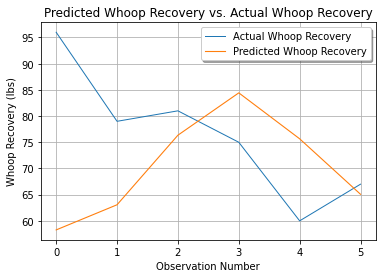

In [59]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label=f"Actual {y.name}")
plt.plot(x_ax, y_pred, linewidth=1.1, label=f"Predicted {y.name}")
plt.title(f"Predicted {y.name} vs. Actual {y.name}")
plt.xlabel('Observation Number')
plt.ylabel(f'{y.name} (lbs)')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

### Analysis and Impact 

# Linear Regression

### Reasoning and Methodology 

Though Random Forest Regression seems to be a reasonable and scalable fit for the data, it is worth implementing Linear Regression because of it's simplicity. While it is certainly simple to implement, it is also more easily understandable to peopel with less experience with data and statistics. Linear regression also allows flexibility in inputting both continous and discrete variables by normalizing discrete variables to become continuous. This model also outputs clear regression coefficients, which are extremely readable and applicable to this project.

### Implementation 

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [61]:
regr = LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)
r2_score(y_pred, y_test)

-2.8150258759391678

In [62]:
feature_titles = X_train.columns
reg_coef = regr.coef_

In [63]:
for i in range(len(feature_titles)):
    print(f'{feature_titles[i]}: {round(reg_coef[i], 2)}')

Day of Week: 2.34
Hours of Sleep: -4.9
Body Weight: 2.04
Sick Feeling: -2.79
Alcohol (# of Drinks): -7.03
CBD (mg): 0.0


### Analysis and Impact 